In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [77]:
url='https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto18/TasaDeIncidencia.csv'
df= pd.read_csv(url)
df

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,30-03-2020,01-04-2020,03-04-2020,06-04-2020,08-04-2020,...,05-12-2022,09-12-2022,12-12-2022,16-12-2022,19-12-2022,23-12-2022,26-12-2022,30-12-2022,05-01-2023,09-01-2023
0,Arica y Parinacota,15,Arica,15101.0,247552.0,2.4,2.4,4.8,16.6,25.4,...,32140.3,32272.4,32372.6,32552.4,32689.7,32867.4,33008.4,33332.8,33512.2,33565.5
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,16463.9,16626.1,16788.3,16788.3,16869.4,17193.8,17274.9,17437.1,17518.2,17518.2
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,14321.0,14321.0,14321.0,14321.0,14321.0,14444.4,14567.9,14691.4,15061.7,15185.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,21709.7,21868.8,21868.8,21988.1,22186.9,22306.2,22584.5,23300.2,23578.5,23658.1
4,Arica y Parinacota,15,Total,NaN,252110.0,2.4,2.4,4.8,16.3,25.0,...,31992.8,32124.9,32224.0,32401.7,32539.0,32716.7,32858.7,33185.5,33366.0,33419.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Magallanes y la Antartica,12,Rio Verde,12103.0,211.0,0.0,0.0,0.0,0.0,0.0,...,21327.0,22274.9,23222.7,23696.7,23696.7,23696.7,23696.7,23696.7,23696.7,23696.7
358,Magallanes y la Antartica,12,San Gregorio,12104.0,681.0,0.0,0.0,0.0,0.0,0.0,...,21292.2,21292.2,21292.2,21292.2,21292.2,21292.2,21292.2,21439.1,21439.1,21439.1
359,Magallanes y la Antartica,12,Timaukel,12303.0,282.0,0.0,0.0,0.0,0.0,0.0,...,19148.9,19148.9,19503.5,19503.5,19503.5,19503.5,19503.5,19503.5,19503.5,19503.5
360,Magallanes y la Antartica,12,Torres del Paine,12402.0,1021.0,0.0,0.0,0.0,0.0,0.0,...,11459.4,11459.4,11459.4,11459.4,11459.4,11557.3,11557.3,11655.2,11655.2,11753.2


In [78]:
#Se seleccionan las columnas que tienen fechas
vals= list(df.columns)[5:]
#Se seleccionan el resto de las columnas
ids= list(df.columns)[:5]


In [79]:
df_tidy= pd.melt(df, value_vars=vals, id_vars=ids)
df_tidy= df_tidy.rename(columns={'variable':'fechas'})
df_tidy= df_tidy.rename(columns={'value':'Tasa_incidencia'})
df_tidy = df_tidy[~(df_tidy['Comuna'] == 'Total')]
df_tidy

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,fechas,Tasa_incidencia
0,Arica y Parinacota,15,Arica,15101.0,247552.0,30-03-2020,2.4
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,30-03-2020,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,30-03-2020,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,30-03-2020,0.0
5,Tarapaca,1,Alto Hospicio,1107.0,129999.0,30-03-2020,0.0
...,...,...,...,...,...,...,...
104612,Magallanes y la Antartica,12,Punta Arenas,12101.0,141984.0,09-01-2023,39143.1
104613,Magallanes y la Antartica,12,Rio Verde,12103.0,211.0,09-01-2023,23696.7
104614,Magallanes y la Antartica,12,San Gregorio,12104.0,681.0,09-01-2023,21439.1
104615,Magallanes y la Antartica,12,Timaukel,12303.0,282.0,09-01-2023,19503.5


In [80]:
#Inspeccionamos datos faltantes
datos_faltantes = df_tidy.isna().sum()
print(datos_faltantes)


Region             0
Codigo region      0
Comuna             0
Codigo comuna      0
Poblacion          0
fechas             0
Tasa_incidencia    3
dtype: int64


In [81]:
#Llenamos datos faltantes con el valor medio segun su comuna
valor_medio_por_comuna = df_tidy.groupby('Comuna')['Tasa_incidencia'].transform('mean')
df_tidy['Tasa_incidencia'].fillna(valor_medio_por_comuna, inplace=True)

In [82]:
#Inspeccionamos datos faltantes nuevamente
datos_faltantes = df_tidy.isna().sum()
print(datos_faltantes)
#Ya no hay datos faltantes

Region             0
Codigo region      0
Comuna             0
Codigo comuna      0
Poblacion          0
fechas             0
Tasa_incidencia    0
dtype: int64


In [84]:
df_tidy['fechas']=pd.to_datetime(df_tidy['fechas'], format='%d-%m-%Y')
df_tidy

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,fechas,Tasa_incidencia
0,Arica y Parinacota,15,Arica,15101.0,247552.0,2020-03-30,2.4
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,2020-03-30,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,2020-03-30,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,2020-03-30,0.0
5,Tarapaca,1,Alto Hospicio,1107.0,129999.0,2020-03-30,0.0
...,...,...,...,...,...,...,...
104612,Magallanes y la Antartica,12,Punta Arenas,12101.0,141984.0,2023-01-09,39143.1
104613,Magallanes y la Antartica,12,Rio Verde,12103.0,211.0,2023-01-09,23696.7
104614,Magallanes y la Antartica,12,San Gregorio,12104.0,681.0,2023-01-09,21439.1
104615,Magallanes y la Antartica,12,Timaukel,12303.0,282.0,2023-01-09,19503.5


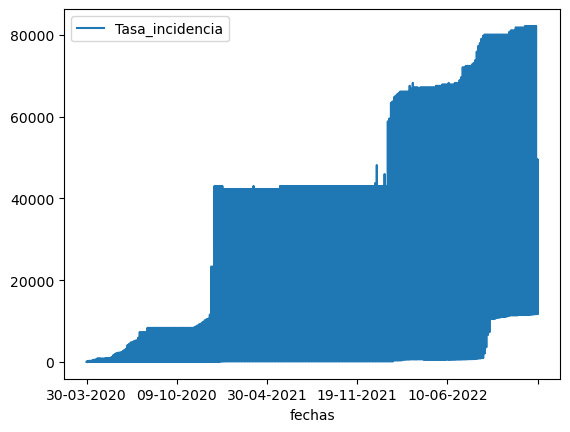

In [66]:
df_tidy.plot(x='fechas', y='Tasa_incidencia')
plt.show()

In [67]:
df = df_tidy.groupby(['Region', 'Comuna', 'Poblacion'])['Tasa_incidencia'].mean().reset_index()
df

,Region,Comuna,Poblacion,Tasa_incidencia
0,Antofagasta,Antofagasta,425725.0,10757.582699
1,Antofagasta,Calama,190336.0,11077.826644
2,Antofagasta,Maria Elena,6814.0,10795.654325
3,Antofagasta,Mejillones,14776.0,13568.267128
4,Antofagasta,Ollague,287.0,30792.237716
...,...,...,...,...
341,Valparaiso,Santo Domingo,11934.0,11181.525000
342,Valparaiso,Valparaiso,315732.0,11577.510035
343,Valparaiso,Villa Alemana,139310.0,9386.930450
344,Valparaiso,Vina del Mar,361371.0,10475.562630


In [68]:
# Calcular la correlación entre las columnas "Columna1" y "Columna2"
correlacion = df['Tasa_incidencia'].corr(df['Poblacion'])

# Mostrar el valor de la correlación
print(correlacion)

0.025488609136978705


<Axes: >

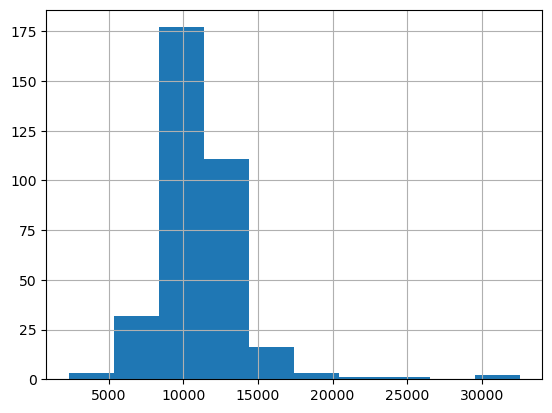

In [69]:
df['Tasa_incidencia'].hist()

In [70]:
# Descompone una columna de series temporales
descomposicion = seasonal_decompose(df_tidy['Tasa_incidencia'],
                                    model='additive', period=1)
descomposicion.plot()
plt.show()

ValueError: This function does not handle missing values